[[ -10  -10]
 [ -94  -94]
 [-576 -576]
 ...
 [ 311  311]
 [ 102  102]
 [ 105  105]]
int16


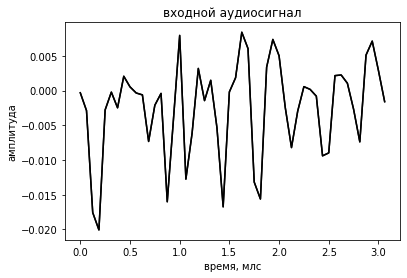

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile # чтение аудиофайлов

sampling_freq, signal = wavfile.read('/Users/viktoriaambrosimova/Downloads/3853-163249-0004.wav') # метод read возвращает частоту дискретизации и аудиосигнал

print(signal)
print(signal.dtype)


#нормализуем сигнал
signal = signal/np.power(2, 15)
sig = signal[:50]
time_axis = 1000 * np.arange(0, len(sig), 1) / float(sampling_freq) #временная ось

plt.plot(time_axis, sig, color='black')
plt.xlabel("время, млс")
plt.ylabel("амплитуда")
plt.title("входной аудиосигнал")
plt.show()

/Users/viktoriaambrosimova/DataSpellProject/dsProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/Users/viktoriaambrosimova/DataSpellProject/dsProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  


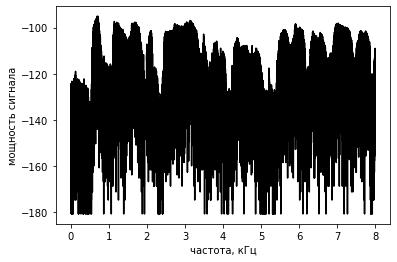

In [15]:
#преобразование сигнала из дискретного временного представления в частотную область
#преобразования Фурье
len_signal = len(signal)
len_half = np.ceil((len_signal + 1) / 2).astype(np.int) # ceil -- округление вверх; извлечение половинной длины
freq_signal = np.fft.fft(signal) # преобразование Фурье
# нормализация частотного сигнала и возведение его в квадрат
freq_signal = abs(freq_signal[0:len_half])/len_signal
freq_signal **= 2
#корректрировка сигнала для четных или нечетных случаев
len_fts = len(freq_signal)
if len_signal % 2 == 1:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

signal_power = 10*np.log10(freq_signal)
a_axis = np.arange(0, len_half, 1)*(sampling_freq/len_signal)/1000
plt.figure()
plt.plot(a_axis, signal_power, color='black')
plt.xlabel("частота, кГц")
plt.ylabel("мощность сигнала")
plt.show()

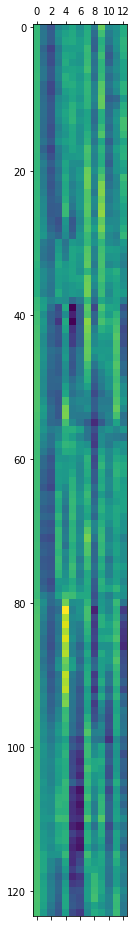

In [16]:
#Практик Джоши
#Mel Frequency Cepstral Coefficient -- MFCC -- инструмент для извлечения частотных характеристик из заданного аудиосигнала
from python_speech_features import mfcc, logfbank
sampling_freq, signal = wavfile.read('/Users/viktoriaambrosimova/Downloads/3853-163249-0004.wav')
signal = signal[0:10000]
#Извлечем MFCC признаки
features_mfcc = mfcc(signal, sampling_freq)
features_fb = logfbank(signal, sampling_freq)
plt.matshow(features_mfcc)